In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
DATA_PATH = "../data/"
TRAIN_PATH = os.path.join(DATA_PATH, "Train.csv")

In [7]:
## reading data
df_train = pd.read_csv(TRAIN_PATH)
df_train.head()

,Image_ID,confidence,class,ymin,xmin,ymax,xmax
0,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,194.649671,328.803454,208.107730,341.967928
1,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,149.632401,256.768914,162.910362,266.195724
2,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,234.046875,327.138158,252.712993,338.876645
3,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,221.277138,340.411184,238.593750,354.651316
4,id_11ee1c.jpg,1.0,Pepper_Fusarium,2000.563598,989.588908,2184.252196,1401.748952


#### Goals
- Find most representative bounding boxes

In [10]:
df_train["width"] = df_train["xmax"] - df_train["xmin"]
df_train["height"] = df_train["ymax"] - df_train["ymin"]
df_train["size"] = df_train["width"]*df_train["height"]
df_train["aspect"] = df_train["width"]/df_train["height"]

In [9]:
df_train.head()

,Image_ID,confidence,class,ymin,xmin,ymax,xmax,width,height,size,aspect
0,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,194.649671,328.803454,208.107730,341.967928,133.860197,13.458059,1801.498462,9.946471
1,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,149.632401,256.768914,162.910362,266.195724,103.285362,13.277961,1371.418957,7.778707
2,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,234.046875,327.138158,252.712993,338.876645,86.163651,18.666118,1608.340919,4.616045
3,id_11543h.jpg,1.0,Pepper_Bacterial_Spot,221.277138,340.411184,238.593750,354.651316,116.057566,17.316612,2009.723818,6.702094
4,id_11ee1c.jpg,1.0,Pepper_Fusarium,2000.563598,989.588908,2184.252196,1401.748952,-782.503245,183.688598,-143736.924159,-4.259945


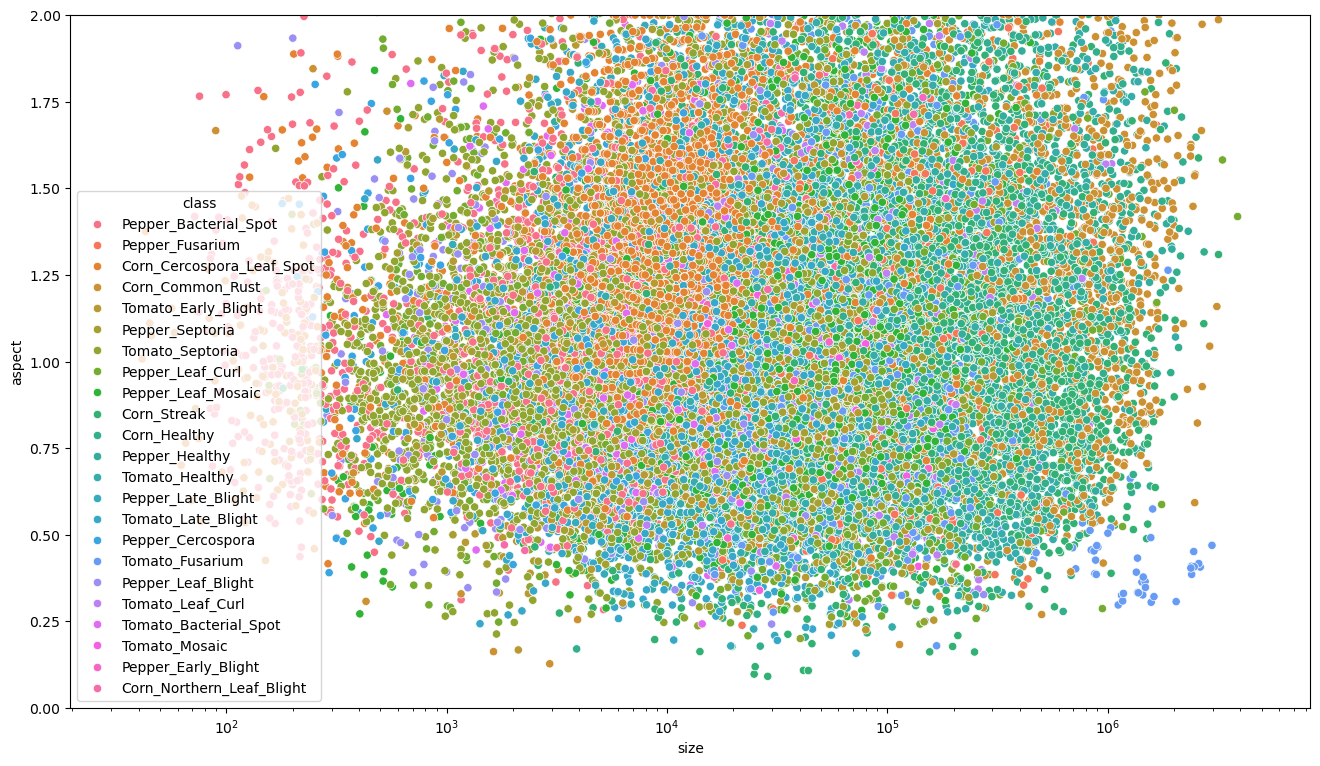

In [24]:
figure = plt.figure(figsize=(16,9))
sns.scatterplot(df_train, x="size", y="aspect", hue="class")
plt.xscale("log")
plt.ylim((0,2))
plt.show()

### Testing Hypotheses

In [89]:
def sampling_dist(data, sample_size=1000, num_samples=100):
    np.random.seed(42)
    means = []
    for i in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        means.append(np.mean(sample))

    std = np.std(data)/sample_size
    return means, std

def get_z(data, means, sampling_std):
    data_mean = np.mean(data)
    sampling_mean = np.mean(means)
    return  (data_mean - sampling_mean)/sampling_std

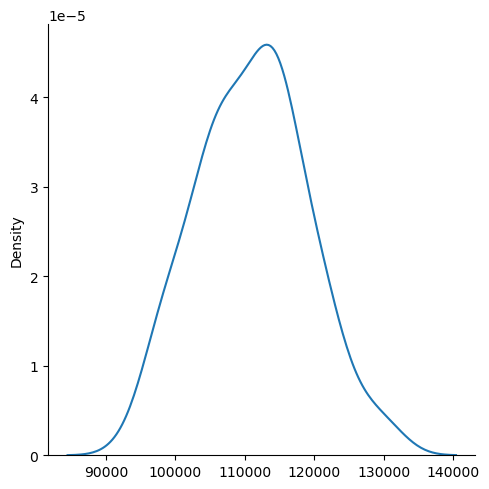

In [73]:
means,sampling_dist_std = sampling_dist(df_train["size"])
sns.displot(means, kind="kde")

In [94]:
get_z(df_train[df_train["class"]=="Corn_Streak"]["size"], means, sampling_dist_std)

655.8340403247606